In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
csv_path = r"D:\Jobb\Siamese Fish\SiameseFish\notebooks\dataset_w_embeddings.csv"

In [15]:
df = pd.read_csv(csv_path)
df["tag"] = df["filename"].apply(lambda x: "_".join(x.split("_")[:2]))
df

,filename,set,sex,length,date,source,x0,x1,x2,x3,...,x120,x121,x122,x123,x124,x125,x126,x127,y,tag
0,201506_l_0.jpg,query,f,137.0,2019-10-29,LabMain,-0.077116,0.105637,-0.074271,0.100927,...,-0.048465,0.105189,0.029454,0.018002,-0.200931,-0.020879,0.081510,0.013793,1,201506_l
1,201506_l_2.jpg,query,f,137.0,2019-10-29,quad,-0.054578,0.034175,-0.067500,0.146062,...,-0.113440,0.038642,-0.058823,0.081565,-0.096594,-0.065069,0.099355,-0.046805,1,201506_l
2,201506_l_3.jpg,query,f,137.0,2019-10-29,quad,-0.029930,0.129353,-0.206279,0.007257,...,-0.079401,0.155462,-0.003738,0.091456,-0.087082,-0.065093,0.044110,0.039260,1,201506_l
3,201506_l_5.jpg,query,f,137.0,2019-10-29,quad,-0.086292,0.017957,-0.125244,0.197527,...,0.138126,0.068444,-0.125858,0.174686,-0.023180,-0.075904,0.075828,0.024108,1,201506_l
4,201506_r_2.jpg,query,f,137.0,2019-10-29,quad,0.026595,-0.021073,0.060628,-0.019170,...,-0.241554,0.095273,-0.009953,0.134105,-0.008553,-0.165508,0.056555,0.097931,0,201506_r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,67510_r_1.jpg,support,f,128.0,2018-06-01,FieldMain,0.063999,-0.011805,-0.081763,0.045121,...,-0.009043,-0.025247,0.053210,0.102455,0.094300,-0.087980,0.128534,0.030491,1000,67510_r
3385,67516_r_0.jpg,support,f,158.0,2018-09-04,FieldMain,0.083352,-0.044169,-0.054885,-0.013318,...,-0.031975,0.013482,-0.121729,0.034925,0.083060,-0.191089,-0.098140,0.040400,1002,67516_r
3386,67516_r_1.jpg,support,f,157.0,2018-07-03,FieldMain,0.061353,-0.023312,-0.090306,-0.028941,...,-0.083485,0.011018,-0.137821,-0.013157,0.049292,-0.212806,-0.119440,0.019543,1002,67516_r
3387,67908_l_0.jpg,support,m,149.0,2018-09-10,FieldMain,0.031002,-0.001717,0.074633,-0.068919,...,-0.189370,0.019040,-0.028708,-0.014768,0.005574,0.028813,-0.135485,0.023307,1003,67908_l


In [16]:
df_support = df[df["set"] == "support"]
df_support

,filename,set,sex,length,date,source,x0,x1,x2,x3,...,x120,x121,x122,x123,x124,x125,x126,x127,y,tag
60,420229_l_2.jpg,support,f,162.0,2019-10-29,quad,-0.013840,0.130445,-0.028600,-0.049889,...,-0.098188,0.108456,0.030052,-0.114206,-0.189227,0.090884,0.117719,-0.126588,50,420229_l
944,201506_l_1.jpg,support,f,138.0,2020-05-02,LabMain,-0.090028,0.029413,-0.113093,0.150540,...,0.070208,0.052677,-0.145878,0.125555,-0.031123,-0.077457,0.043157,0.032810,1,201506_l
945,201506_l_4.jpg,support,f,137.0,2019-10-29,quad,-0.078613,0.046277,-0.155899,0.120569,...,0.100168,0.092084,-0.146475,0.106276,-0.058305,-0.010754,0.018421,0.029628,1,201506_l
946,201506_l_6.jpg,support,f,137.0,2019-10-29,quad,-0.054018,0.047847,-0.151150,0.137168,...,0.067414,0.136117,-0.190074,0.082990,-0.078728,0.009895,0.027522,0.012493,1,201506_l
947,201506_r_0.jpg,support,f,137.0,2019-10-29,LabMain,-0.032633,-0.001188,0.030525,0.025296,...,-0.255644,0.152010,0.063220,0.084712,0.131033,-0.106288,-0.039385,0.053916,0,201506_r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,67510_r_1.jpg,support,f,128.0,2018-06-01,FieldMain,0.063999,-0.011805,-0.081763,0.045121,...,-0.009043,-0.025247,0.053210,0.102455,0.094300,-0.087980,0.128534,0.030491,1000,67510_r
3385,67516_r_0.jpg,support,f,158.0,2018-09-04,FieldMain,0.083352,-0.044169,-0.054885,-0.013318,...,-0.031975,0.013482,-0.121729,0.034925,0.083060,-0.191089,-0.098140,0.040400,1002,67516_r
3386,67516_r_1.jpg,support,f,157.0,2018-07-03,FieldMain,0.061353,-0.023312,-0.090306,-0.028941,...,-0.083485,0.011018,-0.137821,-0.013157,0.049292,-0.212806,-0.119440,0.019543,1002,67516_r
3387,67908_l_0.jpg,support,m,149.0,2018-09-10,FieldMain,0.031002,-0.001717,0.074633,-0.068919,...,-0.189370,0.019040,-0.028708,-0.014768,0.005574,0.028813,-0.135485,0.023307,1003,67908_l


In [17]:
df_query = df[(df["set"] == "query") & (df["source"] == "quad")]
df_query

,filename,set,sex,length,date,source,x0,x1,x2,x3,...,x120,x121,x122,x123,x124,x125,x126,x127,y,tag
1,201506_l_2.jpg,query,f,137.0,2019-10-29,quad,-0.054578,0.034175,-0.067500,0.146062,...,-0.113440,0.038642,-0.058823,0.081565,-0.096594,-0.065069,0.099355,-0.046805,1,201506_l
2,201506_l_3.jpg,query,f,137.0,2019-10-29,quad,-0.029930,0.129353,-0.206279,0.007257,...,-0.079401,0.155462,-0.003738,0.091456,-0.087082,-0.065093,0.044110,0.039260,1,201506_l
3,201506_l_5.jpg,query,f,137.0,2019-10-29,quad,-0.086292,0.017957,-0.125244,0.197527,...,0.138126,0.068444,-0.125858,0.174686,-0.023180,-0.075904,0.075828,0.024108,1,201506_l
4,201506_r_2.jpg,query,f,137.0,2019-10-29,quad,0.026595,-0.021073,0.060628,-0.019170,...,-0.241554,0.095273,-0.009953,0.134105,-0.008553,-0.165508,0.056555,0.097931,0,201506_r
12,209700_l_2.jpg,query,m,179.0,2019-10-29,quad,0.018532,-0.096564,0.061979,0.051271,...,-0.033705,-0.034441,0.064445,-0.114333,0.026636,0.032262,0.053378,0.058521,15,209700_l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,433982_l_5.jpg,query,f,147.0,2019-10-28,quad,-0.117712,0.086225,-0.132648,0.046781,...,0.016339,0.110384,0.001806,0.039839,0.027813,0.056194,0.114251,-0.161407,843,433982_l
876,433982_l_6.jpg,query,f,147.0,2019-10-28,quad,-0.139033,0.020725,-0.125514,0.090476,...,-0.005728,0.092585,0.044610,0.066230,0.069348,-0.027585,0.072750,-0.048870,843,433982_l
877,433982_r_3.jpg,query,f,147.0,2019-10-28,quad,-0.022590,-0.069137,-0.058827,-0.041307,...,-0.041673,0.011060,-0.155243,-0.097551,0.023858,-0.014959,-0.048492,-0.066957,842,433982_r
878,433982_r_4.jpg,query,f,147.0,2019-10-28,quad,-0.110442,-0.139045,-0.085989,0.016913,...,-0.058334,-0.047953,0.012008,-0.137356,-0.024888,-0.191907,0.064340,0.034084,842,433982_r


In [21]:
unique = np.unique(df_query["tag"].values)
unique[:5]

array(['201506_l', '201506_r', '209700_l', '209700_r', '209833_l'],
      dtype=object)

In [23]:
df_subquery = df_query[df_query["tag"] == unique[0]]
df_subquery

,filename,set,sex,length,date,source,x0,x1,x2,x3,...,x120,x121,x122,x123,x124,x125,x126,x127,y,tag
1,201506_l_2.jpg,query,f,137.0,2019-10-29,quad,-0.054578,0.034175,-0.067500,0.146062,...,-0.113440,0.038642,-0.058823,0.081565,-0.096594,-0.065069,0.099355,-0.046805,1,201506_l
2,201506_l_3.jpg,query,f,137.0,2019-10-29,quad,-0.029930,0.129353,-0.206279,0.007257,...,-0.079401,0.155462,-0.003738,0.091456,-0.087082,-0.065093,0.044110,0.039260,1,201506_l
3,201506_l_5.jpg,query,f,137.0,2019-10-29,quad,-0.086292,0.017957,-0.125244,0.197527,...,0.138126,0.068444,-0.125858,0.174686,-0.023180,-0.075904,0.075828,0.024108,1,201506_l


In [32]:
support_emb = df_support.iloc[0, 6:128+6]
query_embs = df_subquery.iloc[:, 6:128+6]
dists = np.linalg.norm(query_embs.sub(support_emb), axis=1)
dist_sqr = dists.sum()**2
dist_sqr

14.076846365281511

In [59]:
y_query = []
for u in unique:
    y = df_query[df_query["tag"] == u].iloc[0,:]["y"]
    y_query.append(y)
y_query = np.array(y_query)
y_query

array([  1,   0,  15,  16,  17,  18,  24,  23,  29,  30,  34,  33,  47,
        48,  50,  49,  93,  94,  96,  95,  99, 100, 106, 105, 112, 111,
       123, 129, 130, 137, 138, 139, 141, 142, 146, 147, 148, 154, 153,
       155, 156, 157, 158, 161, 165, 170, 169, 173, 174, 176, 175, 177,
       178, 179, 182, 181, 185, 190, 189, 194, 193, 197, 198, 201, 203,
       206, 207, 210, 209, 211, 216, 218, 220, 219, 222, 221, 225, 226,
       227, 228, 230, 232, 233, 234, 239, 240, 244, 243, 246, 245, 247,
       248, 250, 252, 251, 253, 254, 256, 257, 258, 262, 266, 268, 267,
       270, 269, 271, 272, 274, 273, 278, 277, 290, 291, 292, 302, 301,
       304, 303, 308, 307, 310, 309, 311, 314, 313, 315, 316, 320, 319,
       323, 325, 326, 328, 327, 330, 331, 332, 336, 335, 338, 337, 339,
       342, 341, 343, 344, 346, 347, 348, 349, 350, 354, 356, 355, 357,
       359, 361, 362, 366, 371, 372, 462, 461, 473, 474, 484, 483, 486,
       485, 492, 491, 494, 493, 496, 495, 506, 505, 507, 524, 53

In [71]:
def sqr_dist(row, subquery):
    support_emb = row.iloc[6:128+6]
    query_embs = subquery.iloc[:, 6:128+6]
    dists = np.linalg.norm(query_embs.sub(support_emb), axis=1)
    sum_ = dists.sum()
    dist_sqr = sum_*sum_
    return dist_sqr

y_pred = []

df_subsupport = df_support
for u in unique:
    df_subquery = df_query[df_query["tag"] == u]
    df_subsupport["distance"] = df_subsupport.apply(lambda row: sqr_dist(row, df_subquery), axis=1)
    df_sorted = df_subsupport.sort_values(by="distance")
    y = df_sorted.iloc[0,:]["y"]
    y_pred.append(y)
    
y_pred = np.array(y_pred)
y_pred

<ipython-input-71-0852c51175c7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subsupport["distance"] = df_subsupport.apply(lambda row: sqr_dist(row, df_subquery), axis=1)


array([  1, 262,  15,  16, 349, 311,  24,  23, 806,  30,  34,  33,  47,
        48,  50,  49,  93,  94,  96,  95,  99, 100, 106, 105, 112, 111,
       362, 129, 130, 137, 138, 209, 250, 142, 146, 274, 148, 154, 153,
       820, 156, 157, 345, 161, 353, 353, 169, 173, 283, 176, 175, 252,
       178, 179, 182, 181, 185, 190, 221, 194, 335, 197, 198, 201, 203,
       206, 207, 179, 209, 211, 216, 218, 247, 219, 222, 221, 225, 226,
       227, 228, 230, 232, 233, 234, 239, 240, 244, 243, 246, 245, 247,
       248, 250, 252, 251, 253, 254, 256, 257, 258, 262, 266, 268, 267,
       270, 269, 271, 335, 274, 273, 278, 277, 290, 291, 292, 302, 301,
       338, 303, 308, 307, 310, 309, 833, 314, 313, 336, 294, 320, 215,
       801, 325, 326, 814, 327, 330, 331, 102, 336, 335, 338, 337, 339,
       342, 341, 343, 344, 346, 347, 348, 349, 350, 801, 356, 355, 273,
       359, 361, 362, 366, 371, 372, 839, 461, 473, 474, 484, 483, 314,
       485, 310, 491, 494, 493, 496, 495, 506, 505, 507, 255, 53

In [74]:
num_correct = (y_pred == y_query).sum()
num_correct

179

In [75]:
num_correct/len(y_pred)

0.8099547511312217

In [82]:
nums = []
for u in unique:
    nums.append(len(df_query[df_query["tag"] == u]))
nums = np.array(nums)
avg = nums.sum()/len(nums)
avg

1.9049773755656108

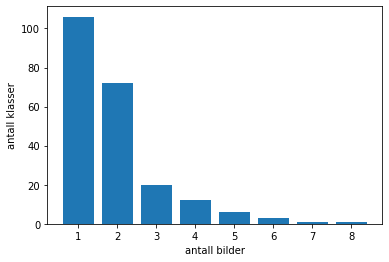

In [124]:
x_data, y_data = np.unique(nums, return_counts=True)
plt.bar(x_data, y_data)
plt.xlabel("antall bilder")
plt.ylabel("antall klasser")
plt.show()

In [97]:
X_train = df_support.iloc[:, 6:128+6].values
y_train = df_support["y"].values

X_test = df_query.iloc[:, 6:128+6].values
y_test = df_query["y"].values

In [106]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7838479809976246

In [ ]:
df_subsupport = df_support
for u in unique:
    df_subquery = df_query[df_query["tag"] == u]
    df_subsupport["distance"] = df_subsupport.apply(lambda row: sqr_dist(row, df_subquery), axis=1)
    df_sorted = df_subsupport.sort_values(by="distance")
    y = df_sorted.iloc[0,:]["y"]
    y_pred.append(y)
    
y_pred = np.array(y_pred)
y_pred

In [115]:
y_pred_rank = []

for i, embedding in enumerate(X_test):
    df_support['distance'] = np.linalg.norm(df_support.iloc[:, 6:128+6].sub(embedding), axis=1)
    df_sorted = df_support.copy()
    df_sorted = df_sorted.sort_values(by='distance', ignore_index=True)  # TODO: Indent?
    k_best = df_sorted['y'][0].tolist()
    y_pred_rank.append(k_best)
y_pred_rank

<ipython-input-115-8d1c7987bb38>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_support['distance'] = np.linalg.norm(df_support.iloc[:, 6:128+6].sub(embedding), axis=1)


[124,
 124,
 1,
 262,
 15,
 16,
 349,
 311,
 24,
 24,
 204,
 814,
 24,
 24,
 23,
 23,
 23,
 23,
 364,
 23,
 806,
 30,
 34,
 34,
 34,
 33,
 33,
 33,
 47,
 292,
 48,
 48,
 50,
 50,
 49,
 49,
 49,
 49,
 93,
 145,
 94,
 94,
 96,
 96,
 95,
 99,
 100,
 106,
 106,
 105,
 112,
 112,
 111,
 362,
 129,
 129,
 130,
 137,
 137,
 138,
 138,
 209,
 250,
 142,
 111,
 111,
 146,
 258,
 111,
 274,
 274,
 148,
 154,
 154,
 154,
 153,
 153,
 153,
 820,
 155,
 156,
 156,
 156,
 156,
 156,
 157,
 157,
 148,
 309,
 161,
 161,
 353,
 194,
 256,
 169,
 173,
 283,
 176,
 175,
 175,
 175,
 356,
 252,
 178,
 178,
 179,
 182,
 181,
 185,
 358,
 190,
 243,
 142,
 194,
 194,
 335,
 197,
 197,
 197,
 197,
 198,
 198,
 198,
 198,
 198,
 198,
 344,
 201,
 326,
 201,
 203,
 206,
 207,
 179,
 209,
 209,
 211,
 216,
 218,
 218,
 247,
 219,
 219,
 222,
 222,
 221,
 225,
 226,
 227,
 135,
 228,
 301,
 230,
 232,
 233,
 233,
 178,
 329,
 344,
 165,
 239,
 801,
 240,
 244,
 244,
 243,
 243,
 243,
 243,
 243,
 246,
 245,
 247

In [116]:
(y_pred_rank == y_test).sum()/len(y_pred_rank)

0.7814726840855107

In [117]:
len(y_pred_rank)
len(y_query)
len(X_test)

421

In [118]:
list(zip(y_pred_rank, y_test))

[(124, 1),
 (124, 1),
 (1, 1),
 (262, 0),
 (15, 15),
 (16, 16),
 (349, 17),
 (311, 18),
 (24, 24),
 (24, 24),
 (204, 24),
 (814, 24),
 (24, 24),
 (24, 24),
 (23, 23),
 (23, 23),
 (23, 23),
 (23, 23),
 (364, 23),
 (23, 23),
 (806, 29),
 (30, 30),
 (34, 34),
 (34, 34),
 (34, 34),
 (33, 33),
 (33, 33),
 (33, 33),
 (47, 47),
 (292, 48),
 (48, 48),
 (48, 48),
 (50, 50),
 (50, 50),
 (49, 49),
 (49, 49),
 (49, 49),
 (49, 49),
 (93, 93),
 (145, 93),
 (94, 94),
 (94, 94),
 (96, 96),
 (96, 96),
 (95, 95),
 (99, 99),
 (100, 100),
 (106, 106),
 (106, 106),
 (105, 105),
 (112, 112),
 (112, 112),
 (111, 111),
 (362, 123),
 (129, 129),
 (129, 129),
 (130, 130),
 (137, 137),
 (137, 137),
 (138, 138),
 (138, 138),
 (209, 139),
 (250, 141),
 (142, 142),
 (111, 146),
 (111, 146),
 (146, 146),
 (258, 146),
 (111, 146),
 (274, 147),
 (274, 147),
 (148, 148),
 (154, 154),
 (154, 154),
 (154, 154),
 (153, 153),
 (153, 153),
 (153, 153),
 (820, 155),
 (155, 155),
 (156, 156),
 (156, 156),
 (156, 156),
 (156, 